```python
import os
import wget
import tarfile
from sklearn.datasets import load_files

# 1️⃣ Download the dataset
url = "http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz"
filename = wget.download(url)
print(f"Downloaded: {filename}")

# 2️⃣ Extract the .tar.gz file
if filename.endswith("tar.gz"):
    with tarfile.open(filename, "r:gz") as tar:
        tar.extractall()
        print("Extraction completed.")

# After extraction, the dataset will be in a folder named 'txt_sentoken'
# It has two subfolders: 'pos' and 'neg'

# 3️⃣ Load the dataset with sklearn
movies = load_files(container_path="txt_sentoken", encoding="utf-8")
x, y = movies.data, movies.target

print(f"Total samples: {len(x)}")
print(f"Positive/Negative labels: {set(y)}")
```

In [1]:
import pickle

```python
# Save (serialize) the loaded dataset
with open("movies_dataset.pkl", "wb") as f:
    pickle.dump(movies, f)
```

In [2]:
# Later (load it again)
with open("movies_dataset.pkl", "rb") as f:
    movies = pickle.load(f)

x, y = movies.data, movies.target
print(len(x), len(y))

2000 2000


In [3]:
# 'neg' -> 0, 'pos' -> 1
print(movies.target_names)

['neg', 'pos']


In [4]:
# First sample and target
print(f'Sample: {x[0]} \nTarget: {y[0]}')

Sample: arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is 

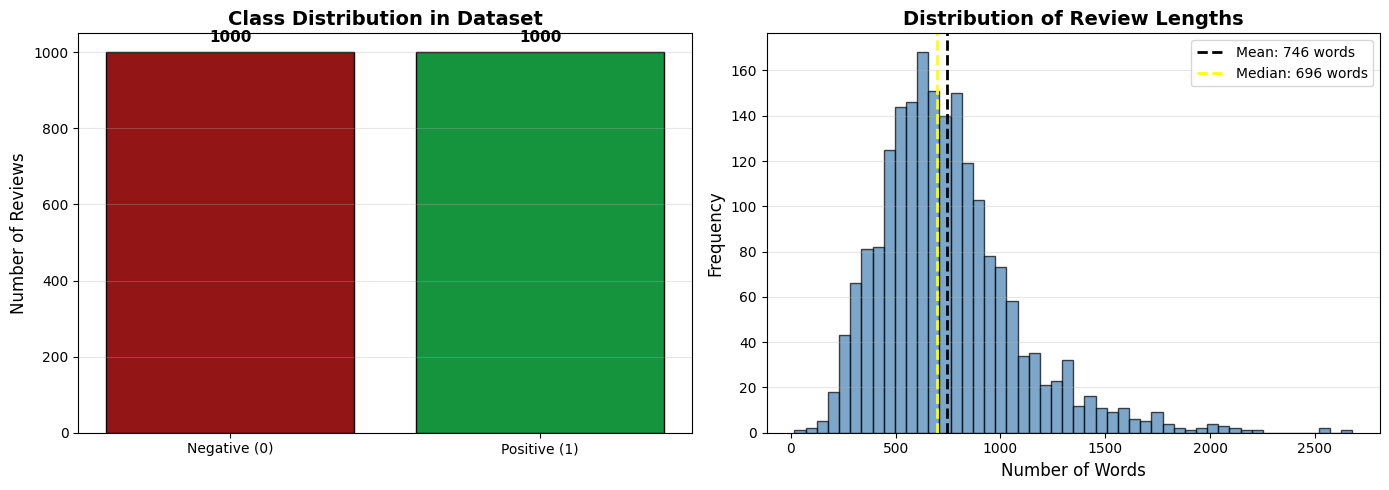

DATASET SUMMARY
Total reviews: 2000
Negative reviews: 1000 (50.0%)
Positive reviews: 1000 (50.0%)

Review Length Statistics:
  Min length: 17 words
  Max length: 2678 words
  Mean length: 746.3 words
  Median length: 696.5 words
  Std deviation: 328.3 words


In [5]:
from matplotlib import pyplot as plt
import numpy as np

# Plot 1: Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Class distribution
class_counts = np.bincount(y)
axes[0].bar(['Negative (0)', 'Positive (1)'], class_counts, color=['#941515', '#15943d'], edgecolor='black')
axes[0].set_ylabel('Number of Reviews', fontsize=12)
axes[0].set_title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
# Add count labels on bars
for i, count in enumerate(class_counts):
    axes[0].text(i, count + 20, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Review Length Distribution
review_lengths = [len(str(review).split()) for review in x]
axes[1].hist(review_lengths, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(np.mean(review_lengths), color='black', linestyle='--', linewidth=2, label=f'Mean: {np.mean(review_lengths):.0f} words')
axes[1].axvline(np.median(review_lengths), color='yellow', linestyle='--', linewidth=2, label=f'Median: {np.median(review_lengths):.0f} words')
axes[1].set_xlabel('Number of Words', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Review Lengths', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total reviews: {len(x)}")
print(f"Negative reviews: {class_counts[0]} ({class_counts[0]/len(x)*100:.1f}%)")
print(f"Positive reviews: {class_counts[1]} ({class_counts[1]/len(x)*100:.1f}%)")
print(f"\nReview Length Statistics:")
print(f"  Min length: {min(review_lengths)} words")
print(f"  Max length: {max(review_lengths)} words")
print(f"  Mean length: {np.mean(review_lengths):.1f} words")
print(f"  Median length: {np.median(review_lengths):.1f} words")
print(f"  Std deviation: {np.std(review_lengths):.1f} words")
print("="*60)

!python -m spacy download en_core_web_sm

In [6]:
import spacy
import re
from tqdm import tqdm

# Load spaCy model — for English, for Greek you may need something like "el_core_news_sm"
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])  
# disabling parser and ner may speed up processing since you only need POS + lemma

docs = []
for doc_text in tqdm(x):
    # Remove non-word characters (punctuation etc)
    doc_clean = re.sub(r'\W', ' ', str(doc_text))
    # Remove single characters (optional)
    doc_clean = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc_clean)
    # Collapse multiple spaces
    doc_clean = re.sub(r'\s+', ' ', doc_clean, flags=re.I)
    # Lowercase
    doc_clean = doc_clean.lower().strip()
    
    # Process with spaCy
    doc = nlp(doc_clean)
    tokens = []
    for token in doc:
        # filter: only alphabetic tokens, non-stopwords, maybe length > 1
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)
    # Reconstruct document string
    docs.append(" ".join(tokens))

print("\nOriginal review text:\n{}".format(x[0]))
print("\nFiltered review text:\n{}".format(docs[0]))
print("\nLabel:\n", y[0])

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:32<00:00, 13.12it/s]


Original review text:
arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes

```python
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.3, random_state=2025) # shuffle=True by default
# x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.3, random_state=2025, stratify=y) # stratify preserves class distribution across splits (recommended for imbalanced classes)
```

In [7]:
from sklearn.model_selection import train_test_split

# 1️⃣ Split into train (70%) and temp (30%)
x_train, x_temp, y_train, y_temp = train_test_split(
    docs, y, test_size=0.3, random_state=2025)

# 2️⃣ Split temp into validation (10%) and test (20%)
# 10% of total = 10/30 = 1/3 of temp
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=(2/3), random_state=2025)

print(len(x_train), len(x_val), len(x_test))

1400 200 400


```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Exclude stopwords

# --- NLTK ---
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# # Get NLTK’s English stop-words
# stopwords = stopwords.words('english')

# --- spacy ---
import spacy
# Load spaCy model (for English texts)
nlp = spacy.load("en_core_web_sm")
# Get spaCy’s default stop-words
stopwords = list(nlp.Defaults.stop_words)

# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range = (1, 2), # Unigrams and Bigrams → captures single words and frequent two-word phrases.
    max_features = 5000,  # Max 5,000 features → keeps the top features by importance.
    #Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf) → dampens the effect of very frequent terms.
    sublinear_tf = True)
    # max_df = 0.x,          # Ignore terms that appear in more than x% of the documents (ignore too common tokens)
    # min_df = y,            # Ignore terms that appear in fewer than y documents (ignore too rare tokens)
    # stop_words and lowercase were already applied during preprocessing, but are supported by the vectorizer as well
    
# Fit Vectorizer on train data
# Transform on all data (train - test)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print([vectorizer.get_feature_names_out()[i] for i in range(1, 50, 5)]) # Shows the learned vocabulary
print(len(vectorizer.get_feature_names_out())) # Number of features == 5000
```

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load spaCy model (for English texts)
nlp = spacy.load("en_core_web_sm")
# Get spaCy’s default stop-words
stopwords = list(nlp.Defaults.stop_words)

# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    sublinear_tf=True
)

# Fit Vectorizer on train data
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)
x_test_tfidf = vectorizer.transform(x_test)

print([vectorizer.get_feature_names_out()[i] for i in range(1, 50, 5)]) 
print(len(vectorizer.get_feature_names_out()))

['ability', 'absolute', 'abyss', 'acceptable', 'accomplish', 'accuse', 'acid', 'action film', 'action sequence', 'actor play']
5000


In [9]:
print(f'Shape of train data: {x_train_tfidf.shape}')
print(f'Shape of val data: {x_val_tfidf.shape}')
print(f'Shape of test data: {x_test_tfidf.shape}')

# TFIDF Vectorizer returns Sparse matrix structures --> Saves only the cells which are not zero (be memory efficient), so it can not be printed directly
print(x_test_tfidf.todense()[0, :40])

Shape of train data: (1400, 5000)
Shape of val data: (200, 5000)
Shape of test data: (400, 5000)
[[0.         0.         0.05449696 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.05867306 0.06853785
  0.         0.         0.         0.        ]]


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the theme for seaborn plots
sns.set_theme(rc={'figure.figsize':(8,6)})

Training took: 0.0012 seconds 

Train accuracy: 50.64%
Test accuracy: 50.50% 

#Class 0 in Train dataset: (691,)
#Class 1 in Train dataset: (709,)

Confusion Matrix for test data:


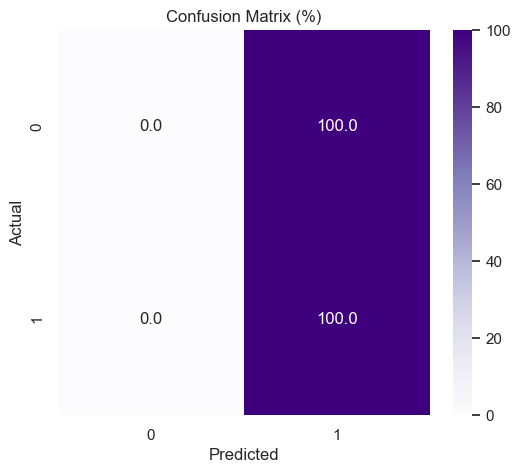

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Train baseline model
baseline = DummyClassifier(strategy='most_frequent')
start_time = time.time()
baseline.fit(x_train_tfidf, y_train)
print(f"Training took: {time.time() - start_time:.4f} seconds \n")

# Evaluate
predictions = baseline.predict(x_train_tfidf)
score = accuracy_score(y_train, predictions)
print(f"Train accuracy: {score*100:.2f}%")

predictions_test = baseline.predict(x_test_tfidf)
score = accuracy_score(y_test, predictions_test)
print(f"Test accuracy: {score*100:.2f}% \n")

print('#Class 0 in Train dataset:', np.where(y_train == 0)[0].shape)
print('#Class 1 in Train dataset:', np.where(y_train == 1)[0].shape)

print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Compute percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with percentages
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()


logistic regression

```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train
clf_lr = LogisticRegression(solver="lbfgs", penalty="l2", C=1.0, random_state=2025)

start_time = time.time()
clf_lr.fit(x_train_tfidf, y_train)
print(f"Training took: {time.time() - start_time:.4f} seconds \n")

# Evaluate
predictions = clf_lr.predict(x_train_tfidf)
score = f1_score(y_train, predictions)
print(f"Train f1-score: {score*100:.2f}%")

predictions_test = clf_lr.predict(x_test_tfidf)
score = f1_score(y_test, predictions_test)
print(f"Test f1-score: {score*100:.2f}% \n")

print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()
```

C=0.01 | Training took: 0.0080 seconds
Train f1: 70.20% | Val f1: 63.31%

C=0.1 | Training took: 0.0145 seconds
Train f1: 91.73% | Val f1: 82.80%

C=1.0 | Training took: 0.0178 seconds
Train f1: 96.69% | Val f1: 83.62%

C=10.0 | Training took: 0.0194 seconds
Train f1: 100.00% | Val f1: 84.39%

C=100.0 | Training took: 0.0226 seconds
Train f1: 100.00% | Val f1: 82.76%

Best C: 10.0 with validation f1-score: 84.39%

Test f1-score: 87.90%

Confusion Matrix for test data:


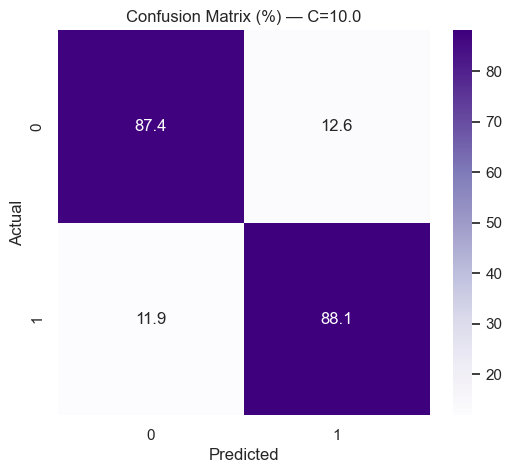

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Explore different C values
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

best_val_score = 0
best_C = None

for C in C_values:
    clf_lr = LogisticRegression(solver="lbfgs", penalty="l2", C=C, random_state=2025)
    
    start_time = time.time()
    clf_lr.fit(x_train_tfidf, y_train)
    print(f"C={C} | Training took: {time.time() - start_time:.4f} seconds")
    
    # Evaluate on train
    train_pred = clf_lr.predict(x_train_tfidf)
    train_f1 = f1_score(y_train, train_pred)
    
    # Evaluate on validation
    val_pred = clf_lr.predict(x_val_tfidf)
    val_f1 = f1_score(y_val, val_pred)
    
    print(f"Train f1: {train_f1*100:.2f}% | Val f1: {val_f1*100:.2f}%\n")
    
    # Track best model
    if val_f1 > best_val_score:
        best_val_score = val_f1
        best_C = C
        best_model = clf_lr
        best_test_pred = best_model.predict(x_test_tfidf)

print(f"Best C: {best_C} with validation f1-score: {best_val_score*100:.2f}%")

# Evaluate best model on test set
test_pred = best_model.predict(x_test_tfidf)
test_f1 = f1_score(y_test, test_pred)
print(f"\nTest f1-score: {test_f1*100:.2f}%")

print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (%) — C={best_C}')
plt.show()

In [13]:
from sklearn.metrics import classification_report

results = classification_report(best_test_pred, y_test, digits=2)
print(results)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       197
           1       0.88      0.88      0.88       203

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



knn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Train
clf_knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
clf_knn.fit(x_train_tfidf, y_train)
print(f"Training took: {time.time() - start_time} seconds \n")

# Evaluate
predictions = clf_knn.predict(x_train_tfidf)
score = f1_score(y_train,predictions)
print(f"Train f1-score: {score*100:.2f}%")

predictions_test = clf_knn.predict(x_test_tfidf)
score = f1_score(y_test, predictions_test)
print(f"Test f1-score: {score*100:.2f}% \n")

Training took: 0.002010345458984375 seconds 

Train f1-score: 82.83%
Test f1-score: 72.94% 



In [15]:
results = classification_report(predictions_test, y_test, digits=2)
print(results)

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       177
           1       0.77      0.70      0.73       223

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.72      0.71      0.71       400




Confusion Matrix for test data:


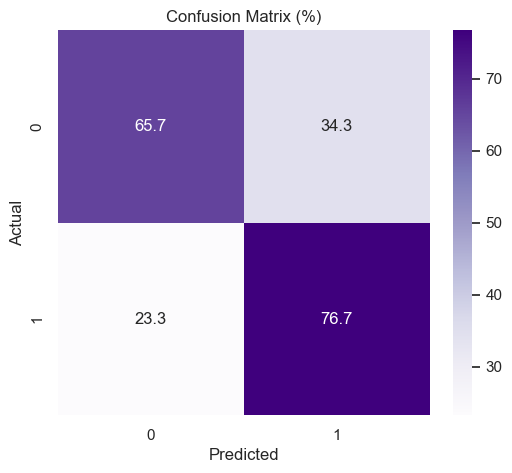

In [16]:
print("\nConfusion Matrix for test data:")

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()

learning curves

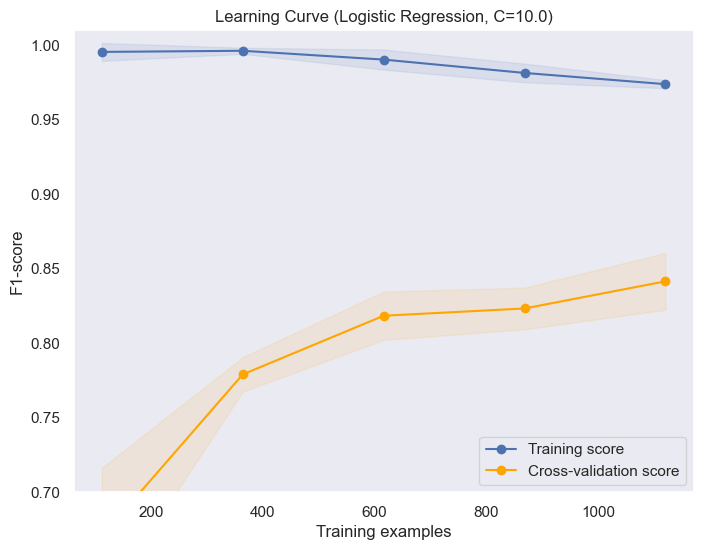

In [17]:
# Learning curves with cross-validation
from sklearn.model_selection import learning_curve, ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring='f1', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


# ---- MAIN ----
x, y = x_train_tfidf, y_train

title = f"Learning Curve (Logistic Regression, C={best_C})"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LogisticRegression(solver="lbfgs", penalty="l2", C=1, random_state=2025)

_=plot_learning_curve(estimator, title, x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()


#### MLP Classifier with TF-IDF features 

##### Convert labels to 1-hot vectors

In [18]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer() # a scikit-learn utility that converts categorical labels into one-hot encoded vectors
target_list = movies.target_names

y_train_1_hot = lb.fit_transform([target_list[x] for x in y_train])
y_val_1_hot = lb.transform([target_list[x] for x in y_val])
y_test_1_hot = lb.transform([target_list[x] for x in y_test])

print('y_train_1_hot[0]: {}'.format(y_train_1_hot[0]))

y_train_1_hot[0]: [0]


In [19]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size=500, hidden_layers=[256, 128], dropout_probs=[0.5, 0.5], output_size=2):
        """
        input_size: int, dimension of input features
        hidden_layers: list of ints, sizes of hidden layers
        dropout_probs: list of floats, dropout for each hidden layer
        output_size: int, number of output classes
        """
        super().__init__()
        
        assert len(hidden_layers) == len(dropout_probs), "Each hidden layer must have a corresponding dropout probability"
        
        layers = []
        in_dim = input_size
        
        for out_dim, drop_prob in zip(hidden_layers, dropout_probs):
            layers.append(nn.Linear(in_dim, out_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(drop_prob))
            in_dim = out_dim
        
        layers.append(nn.Linear(in_dim, output_size))  # final output layer
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)  # logits, suitable for CrossEntropyLoss

# Instantiate model
mlp_classifier = MLP()
print(mlp_classifier)

# Count the total number of parameters
total_params = sum(p.numel() for p in mlp_classifier.parameters())
print(f"Total number of parameters: {total_params}")

# Count the number of trainable parameters
trainable_params = sum(p.numel() for p in mlp_classifier.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {trainable_params}")

MLP(
  (model): Sequential(
    (0): Linear(in_features=500, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Total number of parameters: 161410
Number of trainable parameters: 161410


Before feeding our data into our DataLoaders for Pytorch model training, they must be turned into pytorch Tensors first.

##### Dimensionality Reduction

In [20]:
# Reduce dimensionality using svd 5000 --> 500
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, random_state=4321)
X_train_svd = svd.fit_transform(x_train_tfidf)
X_val_svd = svd.transform(x_val_tfidf)
X_test_svd = svd.transform(x_test_tfidf)

print(X_train_svd.shape)
print(X_val_svd.shape)
print(X_test_svd.shape)

(1400, 500)
(200, 500)
(400, 500)


In [21]:
from torch.utils.data import TensorDataset, DataLoader

# we dont need one-hot encoding for PyTorch's CrossEntropyLoss, it expects class indices 

X_train_tensor = torch.tensor(X_train_svd, dtype=torch.float32)
#y_train_tensor = torch.tensor(y_train_1_hot, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_svd, dtype=torch.float32)
#y_val_tensor = torch.tensor(y_val_1_hot, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_svd, dtype=torch.float32)
#y_test_tensor = torch.tensor(y_test_1_hot, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

The default way of training a model in PyTorch requires us to create a dataloader object, which contains the data and labels in batches

In [22]:
# This is a tunable hyperparameter as discussed in class
batch_size = 256

train_dataset = TensorDataset(X_train_tensor, y_train_tensor) # pairs each input vector with its label
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # divides it into mini-batches of 256 and reshuffles data every epoch (shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

The usual training loop in PyTorch is the following

In [23]:
from torch.optim import Adam

# Lists to store metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

model = MLP() # Instantiate the model. If your model had variable arguments, you would have to set their value here
model.to('cuda')     # Move the model to the device (GPU or CPU)
optimizer = Adam(model.parameters(), lr = 0.001) # Define the optimizer you wish to use, in this case Adam (an optimizer that automatically tunes the learning rate per parameter and updates the model’s weights based on gradients computed by backpropagation)
criterion = nn.CrossEntropyLoss()                # Define the loss function specific to your problem.
# Check pytorch documentation for more details. Different loss functions are used for different problems

# Set the number of epochs
epochs = 100

for epoch in range(epochs):
    # --------------------------
    # Training
    # --------------------------
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch in train_loader:
        features, labels = batch
        features, labels = features.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * features.size(0)  # multiply by batch size
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_train_loss = running_loss / total
    epoch_train_acc = correct / total

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # --------------------------
    # Validation
    # --------------------------
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch in val_loader:  # assuming you have a validation DataLoader
            features, labels = batch
            features, labels = features.to('cuda'), labels.to('cuda')
            outputs = model(features)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * features.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_running_loss / val_total
    epoch_val_acc = val_correct / val_total

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    if(epoch == 0 or epoch % 10 == 9):
        print(f'Epoch [{epoch+1}/{epochs}]'
              f'Train Loss: {epoch_train_loss:.4f}',
              f'Train Acc: {epoch_train_acc:.4f}',
              f'Val Loss: {epoch_val_loss:.4f}',
              f'Val Acc: {epoch_val_acc:.4f}')

Epoch [1/100]Train Loss: 0.6936 Train Acc: 0.4921 Val Loss: 0.6912 Val Acc: 0.5550
Epoch [10/100]Train Loss: 0.3654 Train Acc: 0.9257 Val Loss: 0.4263 Val Acc: 0.8500
Epoch [20/100]Train Loss: 0.0440 Train Acc: 0.9943 Val Loss: 0.3597 Val Acc: 0.8650
Epoch [30/100]Train Loss: 0.0115 Train Acc: 0.9993 Val Loss: 0.4255 Val Acc: 0.8600
Epoch [40/100]Train Loss: 0.0045 Train Acc: 1.0000 Val Loss: 0.4807 Val Acc: 0.8600
Epoch [50/100]Train Loss: 0.0030 Train Acc: 0.9993 Val Loss: 0.5148 Val Acc: 0.8600
Epoch [60/100]Train Loss: 0.0016 Train Acc: 1.0000 Val Loss: 0.5615 Val Acc: 0.8700
Epoch [70/100]Train Loss: 0.0011 Train Acc: 1.0000 Val Loss: 0.5866 Val Acc: 0.8650
Epoch [80/100]Train Loss: 0.0015 Train Acc: 1.0000 Val Loss: 0.6125 Val Acc: 0.8600
Epoch [90/100]Train Loss: 0.0008 Train Acc: 1.0000 Val Loss: 0.6262 Val Acc: 0.8650
Epoch [100/100]Train Loss: 0.0006 Train Acc: 1.0000 Val Loss: 0.6413 Val Acc: 0.8550


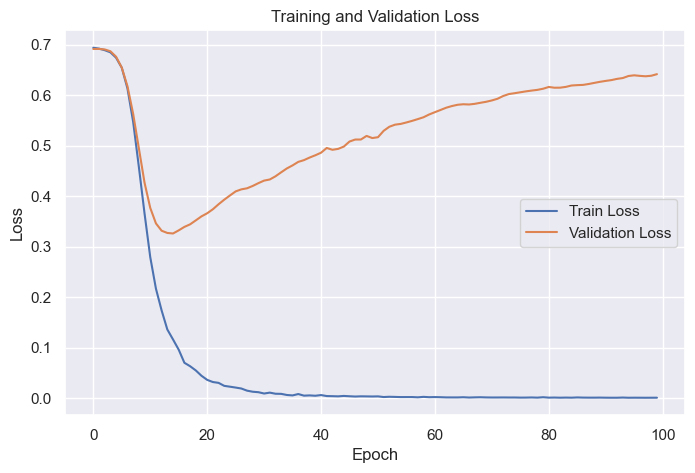

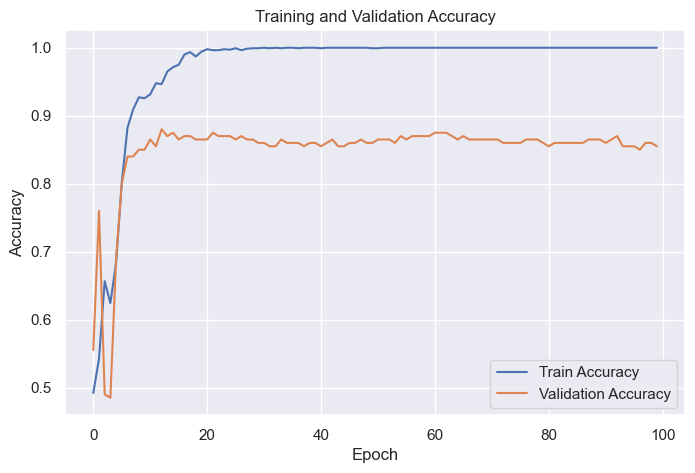

In [24]:
# --------------------------
# Plot Loss
# --------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# --------------------------
# Plot Accuracy
# --------------------------
plt.figure(figsize=(8,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [25]:
# Set the model to evaluation mode
model.eval() # Disable dropout, batchnorm etc.
model.to('cpu')

pred_test = model(X_test_tensor)

y_pred_test = torch.argmax(pred_test, dim=1) # find the index of the highest logit per sample.

print(classification_report(y_test, y_pred_test, target_names=movies.target_names))

              precision    recall  f1-score   support

         neg       0.88      0.83      0.85       198
         pos       0.84      0.89      0.87       202

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



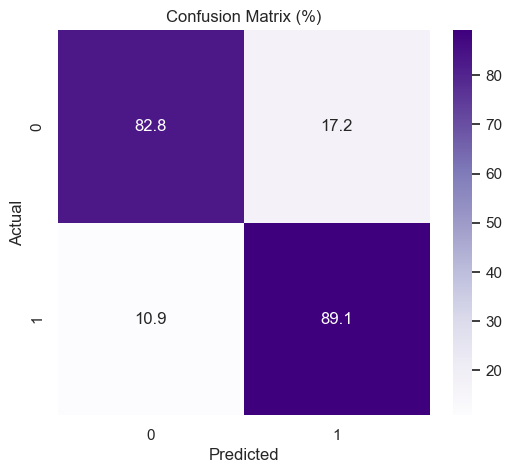

In [26]:
# Convert pred_test to NumPy if it's a tensor
if isinstance(pred_test, torch.Tensor):
    pred_test_np = pred_test.detach().cpu().numpy()
else:
    pred_test_np = pred_test

# If pred_test_np is 2D (logits/probabilities), take argmax
if pred_test_np.ndim > 1:
    pred_test_np = pred_test_np.argmax(axis=1)

# y_test is already NumPy
y_test_np = y_test

# Now compute confusion matrix
cm = confusion_matrix(y_test_np, pred_test_np)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()

##### Grid Search

In [27]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Define hyperparameter grid
grid_hidden_layers = [[256, 128], [128, 64], [256, 128, 64], [256, 128, 64, 32]]
grid_dropout_probs = [[0.5, 0.5], [0.3, 0.3], [0.5, 0.5, 0.5], [0.3, 0.3, 0.3], [0.5, 0.3, 0.2]]
lr_values = [0.001, 0.0005]

# Training hyperparameters
num_epochs = 15  # actual number of epochs per model

best_val_acc = 0.0
best_params = None
best_model_state = None

device = 'cuda' if torch.cuda.is_available() else 'cpu'

for hidden_layers in grid_hidden_layers:
    for dropout_probs in grid_dropout_probs:
        if len(hidden_layers) != len(dropout_probs):
            continue  # skip incompatible combinations
        for lr in lr_values:
            # Instantiate model
            model = MLP(input_size=500, hidden_layers=hidden_layers, dropout_probs=dropout_probs, output_size=2)
            model.to(device)
            
            optimizer = optim.Adam(model.parameters(), lr=lr)
            criterion = nn.CrossEntropyLoss()
            
            # --------------------------
            # TRAIN FOR MULTIPLE EPOCHS
            # --------------------------
            for epoch in range(num_epochs):
                model.train()
                running_loss = 0.0
                for features, labels in train_loader:
                    features, labels = features.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(features)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item() * features.size(0)
                
                epoch_loss = running_loss / len(train_loader.dataset)
                # Optional: print per-epoch loss for debugging
                # print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
            
            # --------------------------
            # VALIDATION
            # --------------------------
            model.eval()
            all_preds = []
            all_labels = []
            with torch.no_grad():
                for features, labels in val_loader:
                    features, labels = features.to(device), labels.to(device)
                    outputs = model(features)
                    preds = outputs.argmax(dim=1)
                    all_preds.append(preds.cpu())
                    all_labels.append(labels.cpu())
            
            all_preds = torch.cat(all_preds).numpy()
            all_labels = torch.cat(all_labels).numpy()
            val_acc = accuracy_score(all_labels, all_preds)
            
            print(f"Hidden: {hidden_layers}, Dropout: {dropout_probs}, LR: {lr}, Val Acc: {val_acc:.4f}")
            
            # Save best
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = (hidden_layers, dropout_probs, lr)
                best_model_state = model.state_dict()

print(f"\nBest Val Accuracy: {best_val_acc:.4f}")
print(f"Best Params: Hidden Layers {best_params[0]}, Dropout {best_params[1]}, LR {best_params[2]}")

Hidden: [256, 128], Dropout: [0.5, 0.5], LR: 0.001, Val Acc: 0.8500
Hidden: [256, 128], Dropout: [0.5, 0.5], LR: 0.0005, Val Acc: 0.8400
Hidden: [256, 128], Dropout: [0.3, 0.3], LR: 0.001, Val Acc: 0.8600
Hidden: [256, 128], Dropout: [0.3, 0.3], LR: 0.0005, Val Acc: 0.8500
Hidden: [128, 64], Dropout: [0.5, 0.5], LR: 0.001, Val Acc: 0.8650
Hidden: [128, 64], Dropout: [0.5, 0.5], LR: 0.0005, Val Acc: 0.8600
Hidden: [128, 64], Dropout: [0.3, 0.3], LR: 0.001, Val Acc: 0.8500
Hidden: [128, 64], Dropout: [0.3, 0.3], LR: 0.0005, Val Acc: 0.8400
Hidden: [256, 128, 64], Dropout: [0.5, 0.5, 0.5], LR: 0.001, Val Acc: 0.8550
Hidden: [256, 128, 64], Dropout: [0.5, 0.5, 0.5], LR: 0.0005, Val Acc: 0.7850
Hidden: [256, 128, 64], Dropout: [0.3, 0.3, 0.3], LR: 0.001, Val Acc: 0.8500
Hidden: [256, 128, 64], Dropout: [0.3, 0.3, 0.3], LR: 0.0005, Val Acc: 0.8650
Hidden: [256, 128, 64], Dropout: [0.5, 0.3, 0.2], LR: 0.001, Val Acc: 0.8500
Hidden: [256, 128, 64], Dropout: [0.5, 0.3, 0.2], LR: 0.0005, Val Acc

In [28]:
# Lists to store metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

model = MLP(hidden_layers = [256, 128, 64], dropout_probs = [0.5, 0.3, 0.2]) # Instantiate the model. If your model had variable arguments, you would have to set their value here
print(model)
model.to('cuda')     # Move the model to the device (GPU or CPU)
optimizer = Adam(model.parameters(), lr = 0.0005) # Define the optimizer you wish to use, in this case Adam (an optimizer that automatically tunes the learning rate per parameter and updates the model’s weights based on gradients computed by backpropagation)
criterion = nn.CrossEntropyLoss()                # Define the loss function specific to your problem.
# Check pytorch documentation for more details. Different loss functions are used for different problems

# Set the number of epochs
epochs = 15

for epoch in range(epochs):
    # --------------------------
    # Training
    # --------------------------
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch in train_loader:
        features, labels = batch
        features, labels = features.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * features.size(0)  # multiply by batch size
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_train_loss = running_loss / total
    epoch_train_acc = correct / total

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # --------------------------
    # Validation
    # --------------------------
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch in val_loader:  # assuming you have a validation DataLoader
            features, labels = batch
            features, labels = features.to('cuda'), labels.to('cuda')
            outputs = model(features)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * features.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_running_loss / val_total
    epoch_val_acc = val_correct / val_total

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

MLP(
  (model): Sequential(
    (0): Linear(in_features=500, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=2, bias=True)
  )
)


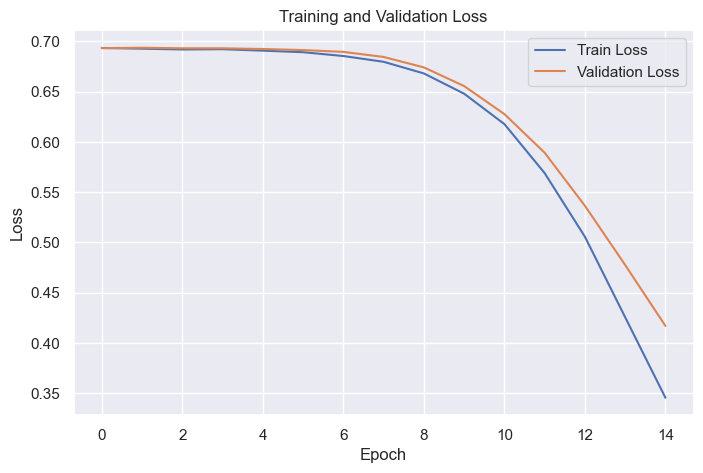

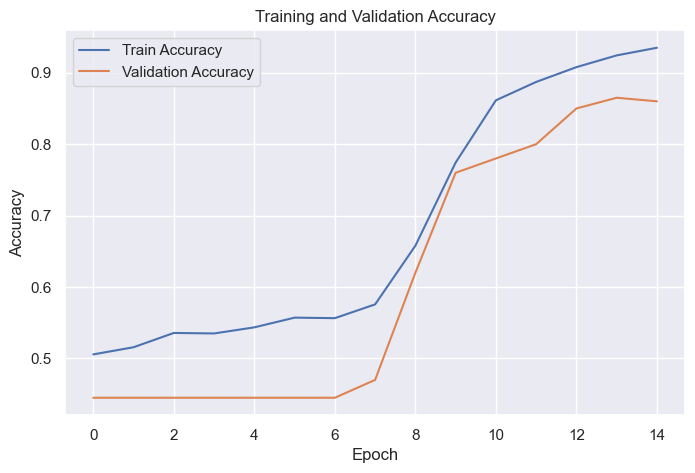

In [29]:
# --------------------------
# Plot Loss
# --------------------------
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# --------------------------
# Plot Accuracy
# --------------------------
plt.figure(figsize=(8,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [30]:
# Set the model to evaluation mode
model.eval() # Disable dropout, batchnorm etc.
model.to('cpu')

pred_test = model(X_test_tensor)

y_pred_test = torch.argmax(pred_test, dim=1) # find the index of the highest logit per sample.

print(classification_report(y_test, y_pred_test, target_names=movies.target_names))

              precision    recall  f1-score   support

         neg       0.89      0.83      0.86       198
         pos       0.84      0.90      0.87       202

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



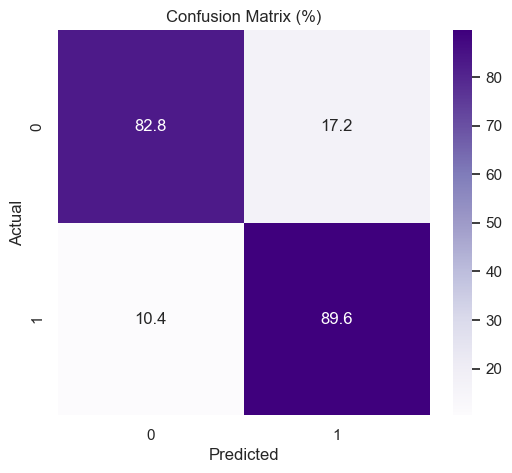

In [31]:
# Convert pred_test to NumPy if it's a tensor
if isinstance(pred_test, torch.Tensor):
    pred_test_np = pred_test.detach().cpu().numpy()
else:
    pred_test_np = pred_test

# If pred_test_np is 2D (logits/probabilities), take argmax
if pred_test_np.ndim > 1:
    pred_test_np = pred_test_np.argmax(axis=1)

# y_test is already NumPy
y_test_np = y_test

# Now compute confusion matrix
cm = confusion_matrix(y_test_np, pred_test_np)

# Convert to percentages row-wise
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()